In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#EXP.1 To plot the top 10 languages from a CSV file that contains the total repositories from each TOPIC on Github from 2011-2022

In [46]:

df_repos = pd.read_csv("repos.csv")
df_repos.head()

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


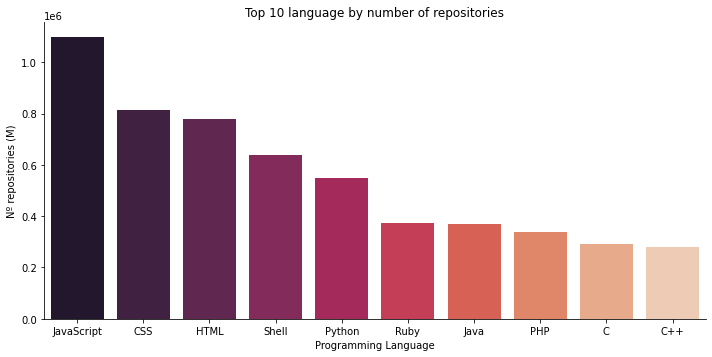

In [47]:
sns.catplot(x="language", y="num_repos",
                             kind="bar",
                             palette="rocket",
                             height=5, aspect=2,
                             data=df_repos.head(10)).set(title=f"Top 10 language by number of repositories").set_xlabels("Programming Language").set_ylabels("Nº repositories (M)")

In [48]:
# The next dataframe is about pull requests.This requests are the way you can show others your proposed changes 
# for a specific branch.

df_prs = pd.read_csv("prs.csv")
df_prs.head()

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [49]:
# Basic descriptive statistics:

df_prs[["count"]].describe()

,count
count,3462.000000
mean,11131.740901
std,34686.780996
min,100.000000
25%,230.000000
50%,616.500000
75%,3380.500000
max,397530.000000


In [50]:
# Max number of pulling requests (2011-2022) in a quarter

df_prs_max = df_prs["count"].max()
df_prs.loc[df_prs["count"] == df_prs_max]

,name,year,quarter,count
1497,JavaScript,2017,1,397530


In [51]:
# Show the top 10 languages by number of pulling requests by year

def requests_by_year(yr):
    requests_year = (df_prs.loc[df_prs["year"] == yr]
                   .sort_values(["count"], ascending=0)
                   .reset_index(drop=True)
                   .drop_duplicates(subset=["name"], keep="first")
                   )
    return requests_year.head(10)

In [52]:
requests_by_year(2020)

,name,year,quarter,count
0,JavaScript,2020,2,217497
1,Python,2020,2,216155
8,Java,2020,2,143342
12,Go,2020,2,111569
14,TypeScript,2020,2,106263
20,C++,2020,2,89203
23,Ruby,2020,2,78918
28,PHP,2020,2,63502
32,C#,2020,2,45316
36,C,2020,2,37046


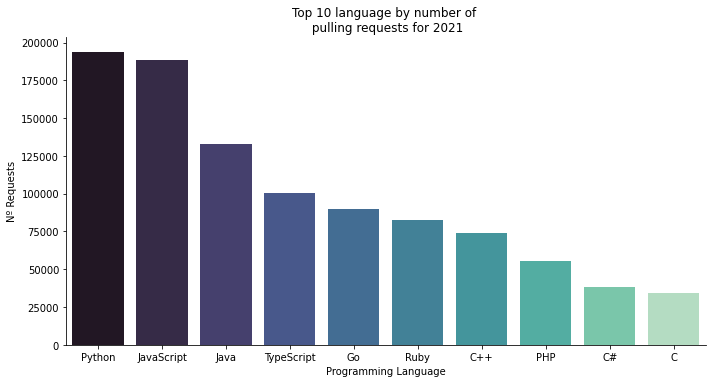

In [53]:
# Evolution of pull requests for each top 10 language by year:
def viz_requests_year(yr):
    return sns.catplot(x="name", y="count",
                             kind="bar",
                             palette="mako",
                             height=5, aspect=2,
                             data=requests_by_year(yr)).set(title=f"Top 10 language by number of \n pulling requests for {yr}").set_xlabels("Programming Language").set_ylabels("Nº Requests")

viz_requests_year(2021)

In [54]:
# The top 10 historical (from 2011 to 2022) languages with the most pulling requests, showing quarter and year. Only the fisrt appearance of the languages is shown:

top_10_prs_hist = df_prs.sort_values("count", ascending=0).drop_duplicates(subset=["name"], keep="first").head(5)
top_10_prs_hist


,name,year,quarter,count
1497,JavaScript,2017,1,397530
1620,Python,2017,2,251826
1499,Java,2017,1,158813
1021,Ruby,2016,1,137821
1500,PHP,2017,1,113779


In [55]:
#Filtering the dataset to only show the languages that are in the top 10
#  historical languages with more pulling requests.

In [56]:
languages_top_prs = top_10_prs_hist["name"].unique()

In [57]:
df_top_prs = df_prs[df_prs["name"].isin (languages_top_prs)]
df_top_prs

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216
...,...,...,...,...
3448,JavaScript,2022,1,1296
3449,Python,2022,1,788
3450,Java,2022,1,608
3452,Ruby,2022,1,483


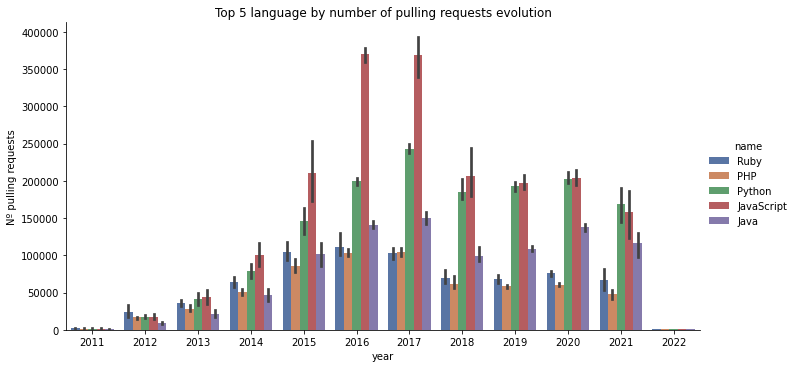

In [58]:
#Visualization of the evolution in the number of pulling requests by year of the top 10 programming languages by number of prs.

viz_prs = sns.catplot(x="year", y="count", 
                         kind="bar",
                         hue="name",
                         palette="deep",
                         height=5, aspect=2,
                         data=df_top_prs).set(title="Top 5 language by number of pulling requests evolution").set_ylabels("Nº pulling requests")

viz_prs

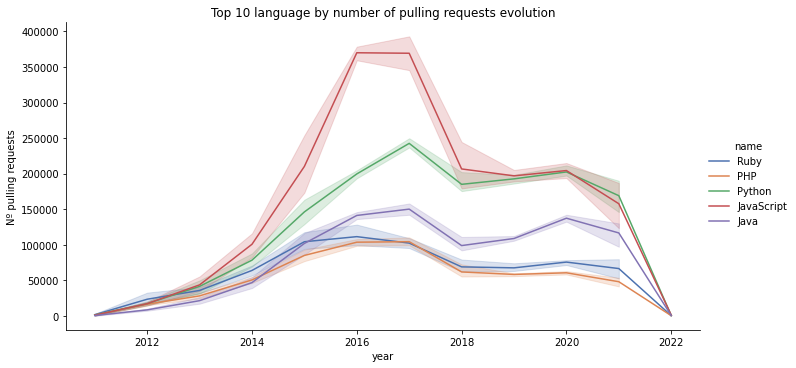

In [59]:
#Visualization of the evolution in the number of pulling requests by year of the top 10 programming languages by number of prs.

viz_prs = sns.relplot(x="year", y="count", 
                         kind="line",
                         hue="name",
                         palette="deep",
                         height=5, aspect=2,
                         data=df_top_prs).set(title="Top 10 language by number of pulling requests evolution").set_ylabels("Nº pulling requests")

viz_prs

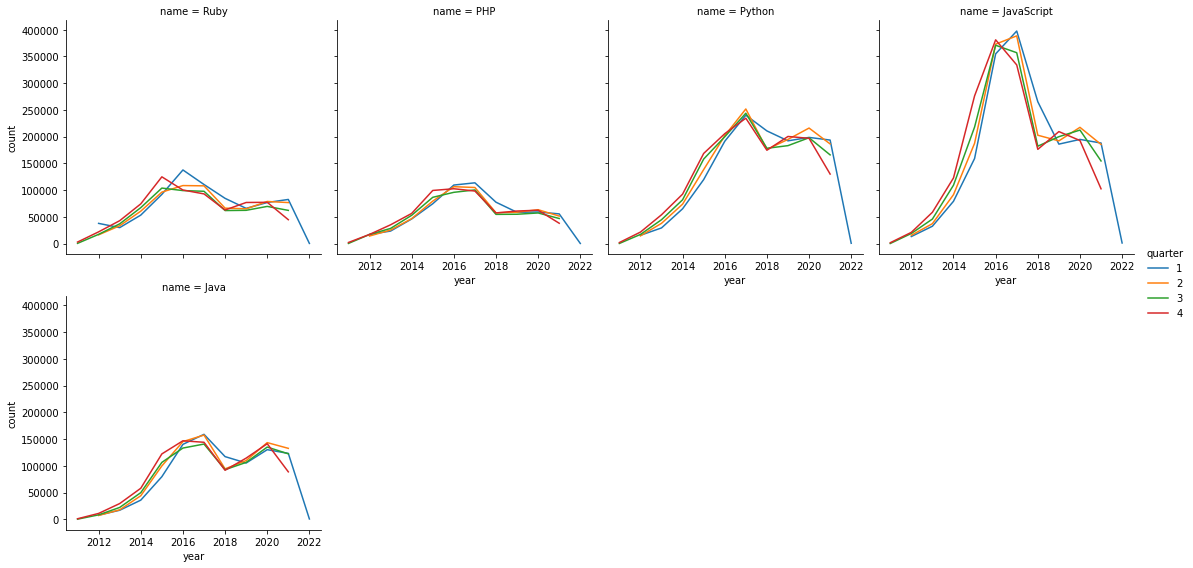

In [60]:
# Visualization of each of the 10 programming languages by number of pulling requests.

lang = sns.FacetGrid(df_top_prs, col = "name", col_wrap=4, height=4, hue="quarter",margin_titles = True, )
lang.map(sns.lineplot, "year", "count")
lang.add_legend()

In [61]:
pr_by_year = df_prs.groupby(['year'])['count'].sum().reset_index().sort_values('count', ascending=False)
pr_by_year.head(10)

,year,count
6,2017,6636621
5,2016,5987402
9,2020,5055278
8,2019,4637549
7,2018,4511395
10,2021,4144760
4,2015,4112878
3,2014,2048373
2,2013,952269
1,2012,430350


Text(0.5, 0, 'Year')

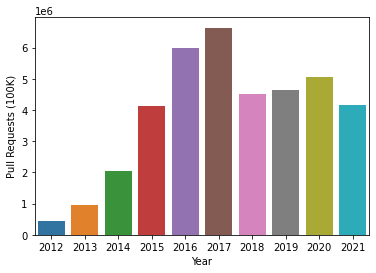

In [62]:
# Excluded 2011 and 2022 due to lack of data
plot_annual_pr = sns.barplot(data=pr_by_year.query('year < 2022 & year > 2011'),x='year',y='count')
plot_annual_pr.set_ylabel('Pull Requests (100K)')
plot_annual_pr.set_xlabel('Year')

In [92]:
name_and_year = df_prs.groupby(['name','year'])
sum_counts = name_and_year['count'].sum().reset_index().sort_values('count', ascending=False)

sum_counts.head(5)

,name,year,count
415,JavaScript,2016,1479882
416,JavaScript,2017,1477140
715,Python,2017,970465
414,JavaScript,2015,841002
417,JavaScript,2018,826691


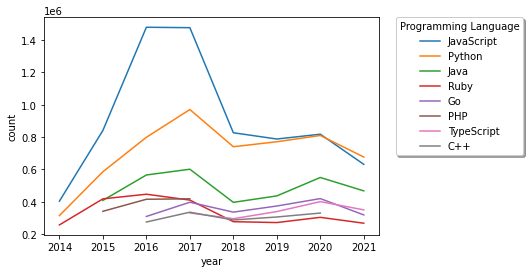

In [93]:
sns.lineplot(data=sum_counts.head(50), x='year',y='count',hue='name')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,title='Programming Language')

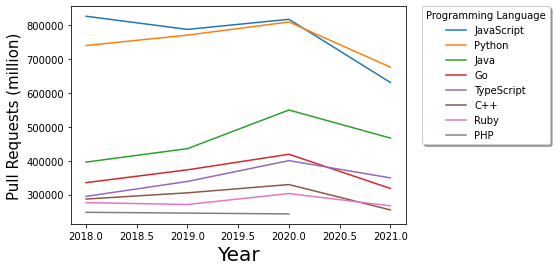

In [94]:
# We'll handle styling in the same code snippet this time
before_22 = sum_counts.query('year >= 2018').head(30)
plot_before_22 = sns.lineplot(data=before_22, x='year',y='count',hue='name')

# Set labels of x and y axis
plot_before_22.set_xlabel('Year',fontsize=20)
plot_before_22.set_ylabel('Pull Requests (million)',fontsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,shadow=True,title='Programming Language')
